max_interactive_distance=  21.0325
effective_adhesion=  0.4
pval_min_dval =  16.020000000000003


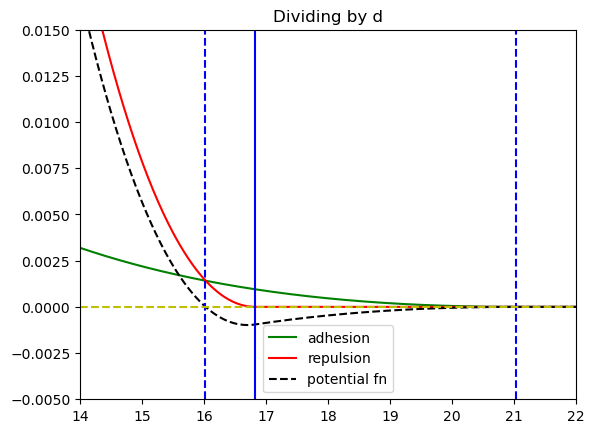

In [26]:
import numpy as np
import matplotlib.pyplot as plt

# imagine one cell at the origin, the 2nd "r" distance from it on the x-axis (default cell radius = 8.413)
r_default = 8.413
#dvals = np.linspace(0.5, 2, 100)
dval = []
pval_repulsion = []  # potential fn
pval_adhesion = []  # potential fn

pval = []  # combined interaction potential fn 

r1 = r_default
r2 = r_default
c1_repulsion = 10.0
c2_repulsion = 10.0
c1_relative_maximum_adhesion_distance = 1.25
c2_relative_maximum_adhesion_distance = 1.25
c1_adhesion = 0.4
c2_adhesion = 0.4
R = r1 + r2
max_interactive_distance = (c1_relative_maximum_adhesion_distance * r1) + (c2_relative_maximum_adhesion_distance * r2)
print("max_interactive_distance= ",max_interactive_distance)   # = 21.0325   (8.4 * 1.25 * 2)
effective_adhesion = np.sqrt(c1_adhesion * c2_adhesion)
print("effective_adhesion= ",effective_adhesion)   # = 0.4

div_d_flag = True   # in add_potentials (in core/PhysiCell_cell.cpp)

pval_min_dval = 999.0
pval_abs_min = 999.0

for d in np.arange(0.1, 25, 0.02):
    dval.append(d)

    # calculate repulsion
    if d > R:
        temp_r = 0
    else:
        temp_r = -d
        temp_r /= R       # -d/R
        temp_r += 1.0     # 1 - d/R
        temp_r *= temp_r  # (1-d/R)^2
    
    effective_repulsion = np.sqrt(c1_repulsion * c2_repulsion)
    temp_r *= effective_repulsion

    if div_d_flag:
        pval_repulsion.append(temp_r/d)
    else:
        pval_repulsion.append(temp_r)

    # calculate adhesion 
    if d < max_interactive_distance:
        temp_a = -d
        temp_a /= max_interactive_distance  # -d/S
        temp_a += 1.0    # 1 - d/S
        temp_a *= temp_a    # (1-d/S)^2
        # effective_adhesion = np.sqrt(c1_adhesion * c2_adhesion)
        temp_a *= effective_adhesion
        # print(f'temp_r= {temp_r}, temp_a= {temp_a} --> temp_r - temp_a = {temp_r - temp_a}')
        temp_r -= temp_a
    else:
        temp_a = 0.0

    if div_d_flag:
        pval_adhesion.append(temp_a/d)
    else:
        pval_adhesion.append(temp_a)

    if div_d_flag:
        temp_r /= d
    pval.append(temp_r)

    # at what distance is the potential ~= 0.0?
    if (d < R) and abs(temp_r) < 1e-4:
        # print(f'{d} -> {temp_r}')
        if abs(temp_r) < pval_abs_min:
            pval_abs_min = abs(temp_r)
            pval_min_dval = d

print("pval_min_dval = ",pval_min_dval)
plt.plot(dval,pval_adhesion,'g',label='adhesion')
plt.plot(dval,pval_repulsion,'r',label='repulsion')
# line = plt.plot(dval,pval,'b')

# plt.plot(dval, np.c_[pval_adhesion, pval_repulsion, pval], label=['adhesion', 'repulsion', 'potential fn']);
plt.plot(dval, pval,'k--', label='potential fn');

plt.legend();

x0 = 14.0
x1 = 22.0
y0 = -0.005
y1 = 0.015

plt.xlim(x0,x1)       # zoom in on ROI
plt.ylim(y0,y1)    # zoom in on ROI
# plt.ylim(-0.05, 30)   # zoomed out

l1_x0 = R
plt.plot([l1_x0,l1_x0],[y0,y1],'b')
plt.plot([max_interactive_distance,max_interactive_distance], [y0,y1],'b--')
plt.plot([pval_min_dval,pval_min_dval], [y0,y1],'b--')
plt.plot([x0,x1],[0,0],'y--')

if div_d_flag:
    plt.title("Dividing by d")
else:
    plt.title("Not dividing by d")

    